In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# unfiltered df
df = pd.read_parquet('../zippedData/merged_data.parquet')
#df

In [3]:
# filtered df by release date 

filtered_df_by_date = df.loc[df.release_date.dt.year >= 2012]
#filtered_df_by_date

In [4]:
# filtered df with genres column exploded

test_filtered_date = filtered_df_by_date.explode("genres")
#test_filtered_date

In [5]:
# df grouped by genre using filtered df
grouped_by_genre_filtered = test_filtered_date.groupby(["genres"]).median().sort_values("ROI", ascending = False).reset_index()
#grouped_by_genre_filtered

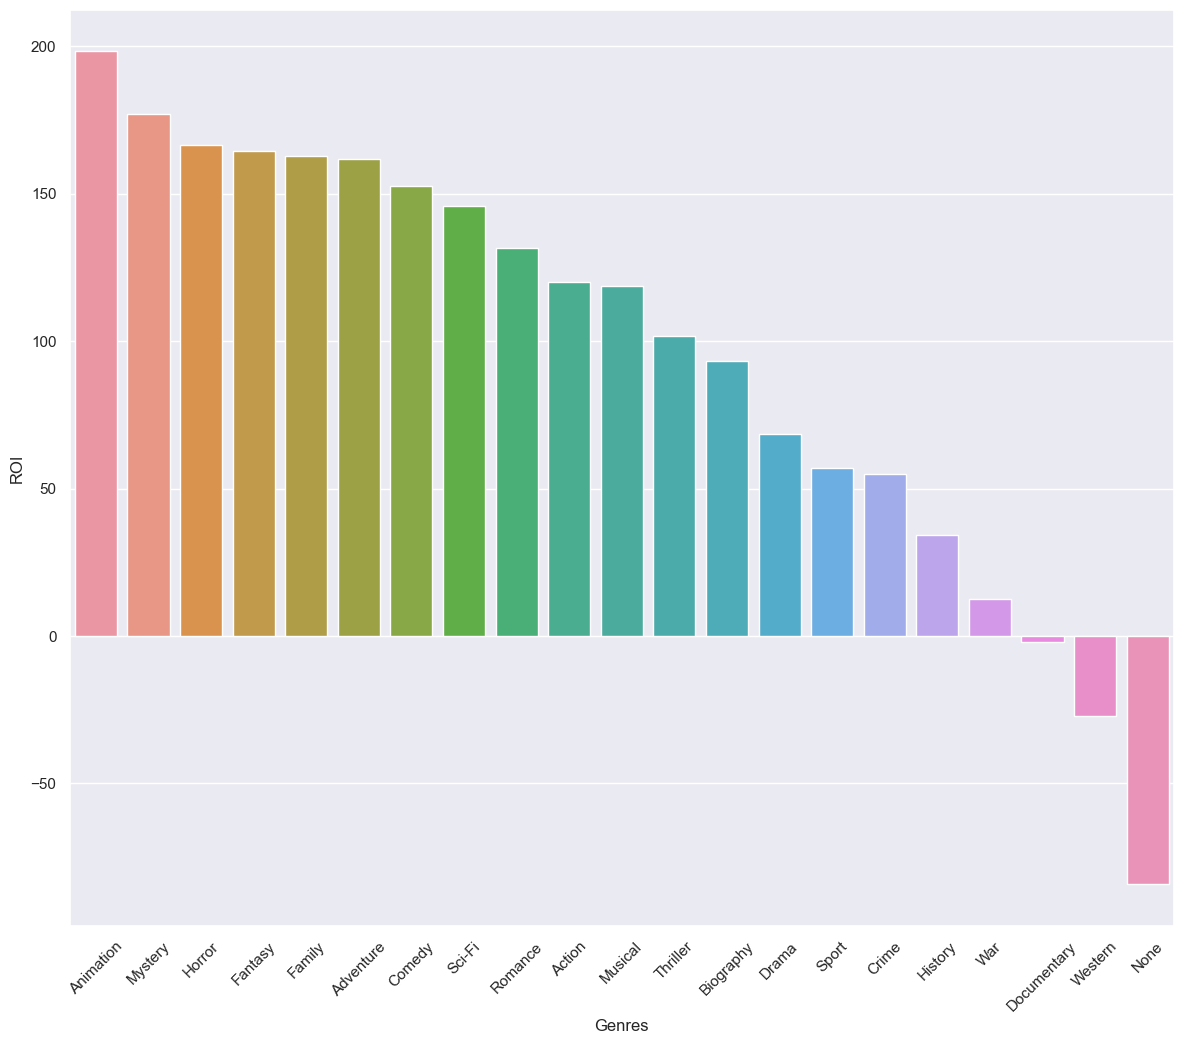

In [28]:
# bar plot of genre and ROI 

# fig = px.bar(grouped_by_genre_filtered, x = "genres", y = "ROI", color_discrete_sequence = ["Purple"])
# fig.show();

fig, ax = plt.subplots(figsize = (12, 10))
ax = sns.color_palette("husl", 9)
ax = sns.barplot(data = grouped_by_genre_filtered, x = "genres", y = "ROI")
ax.set(xlabel = "Genres", ylabel = "ROI")
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show();

In [7]:
# both genres and writers columns are exploded

test_filtered_date = test_filtered_date.explode("writer")
#test_filtered_date

In [8]:
# animation df with ROI_Diff

animation = test_filtered_date.loc[test_filtered_date["genres"] == "Animation"]
animation["ROI_Diff"] = (animation["ROI"] - animation["ROI"].mean()) / animation["ROI"].mean()

C:\Users\jocel\AppData\Local\Temp\ipykernel_15124\3602104526.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date,ROI_Diff
280,alvin and the chipmunks the road chip,177.242173,159517956,90000000,85886987,249517956,Animation,[Walt Becker],Janice Karman,92.0,2015-12-18,-0.276567
280,alvin and the chipmunks the road chip,177.242173,159517956,90000000,85886987,249517956,Animation,[Walt Becker],Ross Bagdasarian,92.0,2015-12-18,-0.276567
280,alvin and the chipmunks the road chip,177.242173,159517956,90000000,85886987,249517956,Animation,[Walt Becker],Randi Mayem Singer,92.0,2015-12-18,-0.276567
280,alvin and the chipmunks the road chip,177.242173,159517956,90000000,85886987,249517956,Animation,[Walt Becker],Adam Sztykiel,92.0,2015-12-18,-0.276567
356,anomalisa,-28.672900,-2293832,8000000,3759286,5706168,Animation,"[Duke Johnson, Charlie Kaufman]",Charlie Kaufman,90.0,2015-12-30,-1.117031


In [9]:
animation_df = animation.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head(5)
animation_top = animation_df["ROI_Diff"]
animation_top = animation_top.to_frame()
animation_top["genre"] = ["Animation", "Animation", "Animation", "Animation", "Animation"]

,ROI_Diff,genre
writer,,
Cinco Paul,3.823304,Animation
Ken Daurio,3.823304,Animation
Brian Lynch,2.526570,Animation
Jason Fuchs,2.371687,Animation
Lori Forte,2.371687,Animation


In [10]:
# mystery df and ROI Diff

mystery = test_filtered_date.loc[test_filtered_date["genres"] == "Mystery"]
mystery["ROI_Diff"] = (mystery["ROI"] - mystery["ROI"].mean()) / mystery["ROI"].mean()

C:\Users\jocel\AppData\Local\Temp\ipykernel_15124\2917392688.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date,ROI_Diff
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Mystery,[Dan Trachtenberg],Josh Campbell,103.0,2016-03-11,3.417363
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Mystery,[Dan Trachtenberg],Damien Chazelle,103.0,2016-03-11,3.417363
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Mystery,[Dan Trachtenberg],Matthew Stuecken,103.0,2016-03-11,3.417363
62,31,-38.484867,-577273,1500000,779820,922727,Mystery,[Rob Zombie],Rob Zombie,102.0,2016-10-21,-1.082296
152,a simple favor,388.143585,77628717,20000000,53548586,97628717,Mystery,[Paul Feig],Jessica Sharzer,117.0,2018-09-14,-0.169992


In [11]:
mystery_df = mystery.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head(5)
mystery_top = mystery_df["ROI_Diff"]
mystery_top = mystery_top.to_frame()
mystery_top["genre"] = ["Mystery", "Mystery", "Mystery", "Mystery", "Mystery"]

,ROI_Diff,genre
writer,,
Carey Van Dyke,7.855500,Mystery
Shane Van Dyke,7.855500,Mystery
James Wan,5.711233,Mystery
Jordan Peele,5.605970,Mystery
Gary Dauberman,5.188153,Mystery


In [12]:
# horror df and ROI Diff

horror = test_filtered_date.loc[test_filtered_date["genres"] == "Horror"]
horror["ROI_Diff"] = (horror["ROI"] - horror["ROI"].mean()) / horror["ROI"].mean()

C:\Users\jocel\AppData\Local\Temp\ipykernel_15124\3067078209.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date,ROI_Diff
1,10 cloverfield lane,2065.72844,103286422,5000000,72082999,108286422,Horror,[Dan Trachtenberg],Josh Campbell,103.0,2016-03-11,3.093683
1,10 cloverfield lane,2065.72844,103286422,5000000,72082999,108286422,Horror,[Dan Trachtenberg],Damien Chazelle,103.0,2016-03-11,3.093683
1,10 cloverfield lane,2065.72844,103286422,5000000,72082999,108286422,Horror,[Dan Trachtenberg],Matthew Stuecken,103.0,2016-03-11,3.093683
15,13 sins,-98.81120,-3952448,4000000,9134,47552,Horror,[Daniel Stamm],David Birke,93.0,2014-04-18,-1.195816
15,13 sins,-98.81120,-3952448,4000000,9134,47552,Horror,[Daniel Stamm],Eakasit Thairaat,93.0,2014-04-18,-1.195816


In [13]:
horror_df = horror.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head()
horror_top = horror_df["ROI_Diff"]
horror_top = horror_top.to_frame()
horror_top["genre"] = ["Horror", "Horror", "Horror", "Horror", "Horror"]

,ROI_Diff,genre
writer,,
Shane Van Dyke,7.206619,Horror
Carey Van Dyke,7.206619,Horror
James Wan,5.219471,Horror
Jordan Peele,5.121921,Horror
David F. Sandberg,4.699667,Horror


In [14]:
# fantasy df and ROI Diff

fantasy = test_filtered_date.loc[test_filtered_date["genres"] == "Fantasy"]
fantasy["ROI_Diff"] = (fantasy["ROI"] - fantasy["ROI"].mean()) / fantasy["ROI"].mean()

C:\Users\jocel\AppData\Local\Temp\ipykernel_15124\382961298.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date,ROI_Diff
60,300 rise of an empire,200.709137,220780051,110000000,106580051,330780051,Fantasy,[Noam Murro],Frank Miller,102.0,2014-03-07,-0.221762
60,300 rise of an empire,200.709137,220780051,110000000,106580051,330780051,Fantasy,[Noam Murro],Zack Snyder,102.0,2014-03-07,-0.221762
60,300 rise of an empire,200.709137,220780051,110000000,106580051,330780051,Fantasy,[Noam Murro],Kurt Johnstad,102.0,2014-03-07,-0.221762
70,47 ronin,-13.304677,-23283185,175000000,38362475,151716815,Fantasy,[Carl Rinsch],Chris Morgan,128.0,2013-12-25,-1.051588
70,47 ronin,-13.304677,-23283185,175000000,38362475,151716815,Fantasy,[Carl Rinsch],Walter Hamada,128.0,2013-12-25,-1.051588


In [15]:
fantasy_df = fantasy.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head()
fantasy_top = fantasy_df["ROI_Diff"]
fantasy_top = fantasy_top.to_frame()
fantasy_top["genre"] = ["Fantasy", "Fantasy", "Fantasy", "Fantasy", "Fantasy"]

,ROI_Diff,genre
writer,,
David Lowery,9.351921,Fantasy
Rick Alvarez,4.287033,Fantasy
Marlon Wayans,4.287033,Fantasy
Benh Zeitlin,3.623876,Fantasy
Lucy Alibar,3.623876,Fantasy


In [16]:
# family df and ROI Diff

family = test_filtered_date.loc[test_filtered_date["genres"] == "Family"]
family["ROI_Diff"] = (family["ROI"] - family["ROI"].mean()) / family["ROI"].mean()

C:\Users\jocel\AppData\Local\Temp\ipykernel_15124\2578075552.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date,ROI_Diff
42,23 blast,-45.081500,-450815,1000000,549185,549185,Family,[Dylan Baker],Toni Hoover,98.0,2014-10-24,-1.195157
42,23 blast,-45.081500,-450815,1000000,549185,549185,Family,[Dylan Baker],Bram Hoover,98.0,2014-10-24,-1.195157
158,a street cat named bob,117.283662,9382693,8000000,82703,17382693,Family,[Roger Spottiswoode],Garry Jenkins,103.0,2016-11-18,-0.492282
158,a street cat named bob,117.283662,9382693,8000000,82703,17382693,Family,[Roger Spottiswoode],James Bowen,103.0,2016-11-18,-0.492282
158,a street cat named bob,117.283662,9382693,8000000,82703,17382693,Family,[Roger Spottiswoode],Tim John,103.0,2016-11-18,-0.492282


In [17]:
family_df = family.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head()
family_top = family_df["ROI_Diff"]
family_top = family_top.to_frame()
family_top["genre"] = ["Family", "Family", "Family", "Family", "Family"]

,ROI_Diff,genre
writer,,
Steve Conrad,5.160231,Family
Jack Thorne,5.160231,Family
R.J. Palacio,5.160231,Family
Brian Lynch,4.520212,Family
Cinco Paul,4.115622,Family


In [18]:
# adventure df and ROI Diff

adventure = test_filtered_date.loc[test_filtered_date["genres"] == "Adventure"]
adventure["ROI_Diff"] = (adventure["ROI"] - adventure["ROI"].mean()) / adventure["ROI"].mean()

C:\Users\jocel\AppData\Local\Temp\ipykernel_15124\1222779676.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date,ROI_Diff
70,47 ronin,-13.304677,-23283185,175000000,38362475,151716815,Adventure,[Carl Rinsch],Chris Morgan,128.0,2013-12-25,-1.058894
70,47 ronin,-13.304677,-23283185,175000000,38362475,151716815,Adventure,[Carl Rinsch],Walter Hamada,128.0,2013-12-25,-1.058894
70,47 ronin,-13.304677,-23283185,175000000,38362475,151716815,Adventure,[Carl Rinsch],Hossein Amini,128.0,2013-12-25,-1.058894
89,a bad moms christmas,356.109107,99710550,28000000,72110659,127710550,Adventure,"[Scott Moore, Jon Lucas]",Scott Moore,104.0,2017-11-01,0.576328
89,a bad moms christmas,356.109107,99710550,28000000,72110659,127710550,Adventure,"[Scott Moore, Jon Lucas]",Jon Lucas,104.0,2017-11-01,0.576328


In [19]:
adventure_df = adventure.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head()
adventure_top = adventure_df["ROI_Diff"]
adventure_top = adventure_top.to_frame()
adventure_top["genre"] = ["Adventure", "Adventure", "Adventure", "Adventure", "Adventure"]

,ROI_Diff,genre
writer,,
Lucy Alibar,4.278671,Adventure
Benh Zeitlin,4.278671,Adventure
Cinco Paul,4.230907,Adventure
Ken Daurio,4.230907,Adventure
Greg Taylor,3.301094,Adventure


In [20]:
# sci_fi df and ROI Diff

sci_fi = test_filtered_date.loc[test_filtered_date["genres"] == "Sci-Fi"]
sci_fi["ROI_Diff"] = (sci_fi["ROI"] - sci_fi["ROI"].mean()) / sci_fi["ROI"].mean()

C:\Users\jocel\AppData\Local\Temp\ipykernel_15124\1490287250.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date,ROI_Diff
1,10 cloverfield lane,2065.72844,103286422,5000000,72082999,108286422,Sci-Fi,[Dan Trachtenberg],Josh Campbell,103.0,2016-03-11,7.258666
1,10 cloverfield lane,2065.72844,103286422,5000000,72082999,108286422,Sci-Fi,[Dan Trachtenberg],Damien Chazelle,103.0,2016-03-11,7.258666
1,10 cloverfield lane,2065.72844,103286422,5000000,72082999,108286422,Sci-Fi,[Dan Trachtenberg],Matthew Stuecken,103.0,2016-03-11,7.258666
146,a quiet place,1867.77820,317522294,17000000,188024361,334522294,Sci-Fi,[John Krasinski],Scott Beck,90.0,2018-04-06,6.467272
146,a quiet place,1867.77820,317522294,17000000,188024361,334522294,Sci-Fi,[John Krasinski],John Krasinski,90.0,2018-04-06,6.467272


In [21]:
sci_fi_df = sci_fi.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head()
sci_fi_top = sci_fi_df["ROI_Diff"]
sci_fi_top = sci_fi_top.to_frame()
sci_fi_top["genre"] = ["Sci-Fi", "Sci-Fi", "Sci-Fi", "Sci-Fi", "Sci-Fi"]

,ROI_Diff,genre
writer,,
Damien Chazelle,7.258666,Sci-Fi
Matthew Stuecken,7.258666,Sci-Fi
Josh Campbell,7.258666,Sci-Fi
Scott Beck,6.467272,Sci-Fi
Bryan Woods,6.467272,Sci-Fi


In [22]:
# sorted and concatenated df's of top genres 

concat_genre_df = pd.concat([animation_top, mystery_top, horror_top, fantasy_top, family_top, adventure_top, sci_fi_top], axis = 0)
sorted_genre_df= concat_genre_df.sort_values("ROI_Diff", ascending = False).reset_index().head(15)

,writer,ROI_Diff,genre
0,David Lowery,9.351921,Fantasy
1,Carey Van Dyke,7.855500,Mystery
2,Shane Van Dyke,7.855500,Mystery
3,Damien Chazelle,7.258666,Sci-Fi
4,Josh Campbell,7.258666,Sci-Fi
5,Matthew Stuecken,7.258666,Sci-Fi
6,Shane Van Dyke,7.206619,Horror
7,Carey Van Dyke,7.206619,Horror
8,Bryan Woods,6.467272,Sci-Fi
9,Scott Beck,6.467272,Sci-Fi


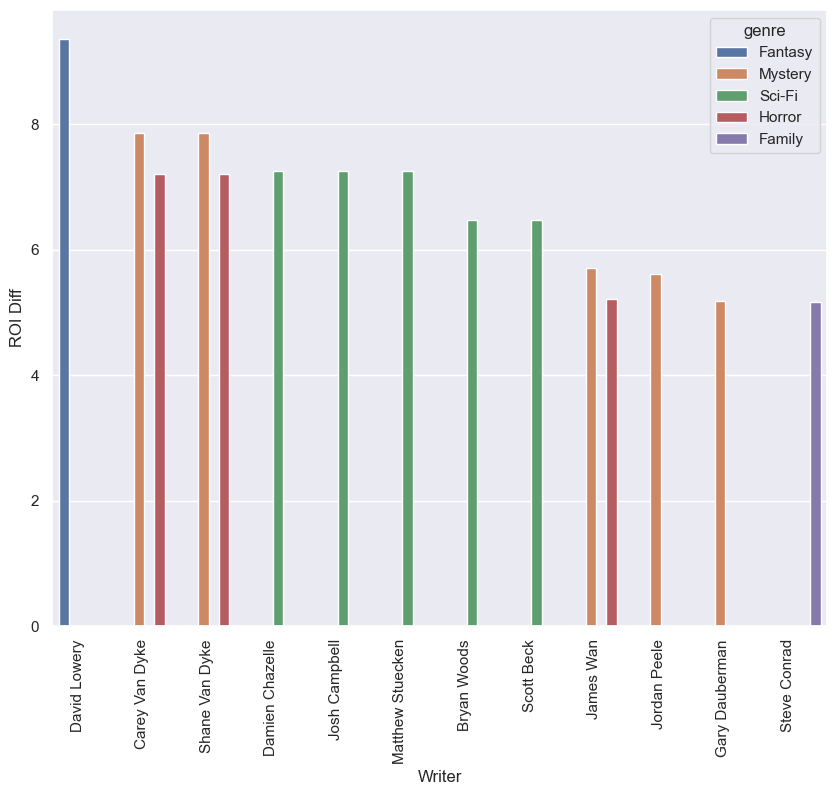

In [33]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.color_palette("flare", 9)
ax = sns.barplot(data = sorted_genre_df, x = "writer", y = "ROI_Diff", hue = "genre")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right")
ax.set(xlabel = "Writer", ylabel = "ROI Diff")
plt.tight_layout
plt.show();